### Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

Возьмем данные из материалов

In [20]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [21]:
all_series = [
    ("Monthly sales of company X", sales_of_company_x["Count"]),
    ("Monthly Boston armed robberies", robberies_in_boston["Count"]),
    ("Mean monthly air temperature (Deg. F) Nottingham Castle", mean_monthly_temp["Deg"]),
    ("Weekly closings of the Dow-Jones industrial average", dowjones_closing["Close"]),
    ("Daily total female births in California", female_births["Count"])
]

In [22]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh', title='Original'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()
    return

#### "Monthly sales of company X" 

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
Lags Used                      12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


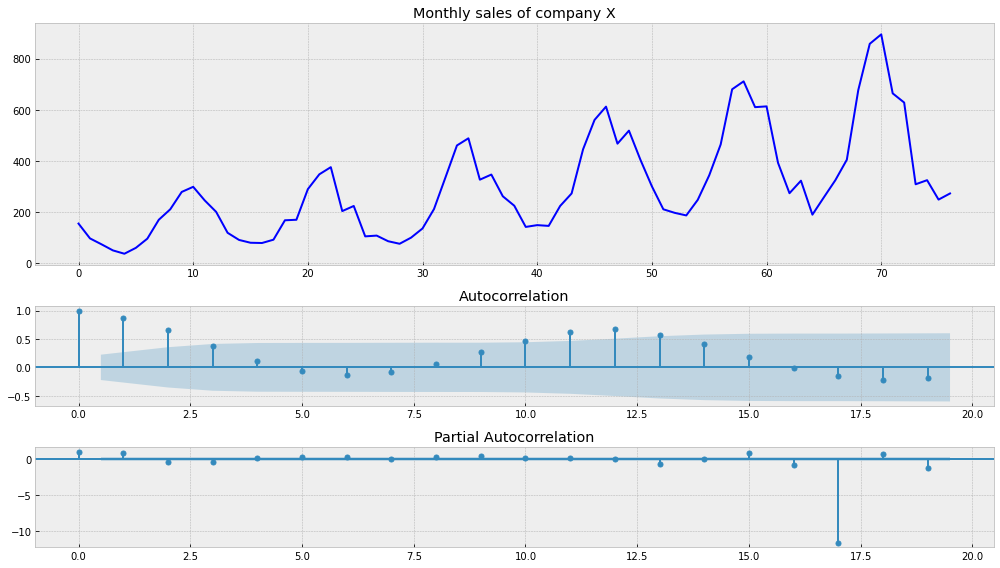

In [23]:
i = 0
title, series = all_series[i]
tsplot(series, title=title)

p-value говорит нам о нестационарности ряда и графики визуально подтверждают.
Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
Lags Used                      12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


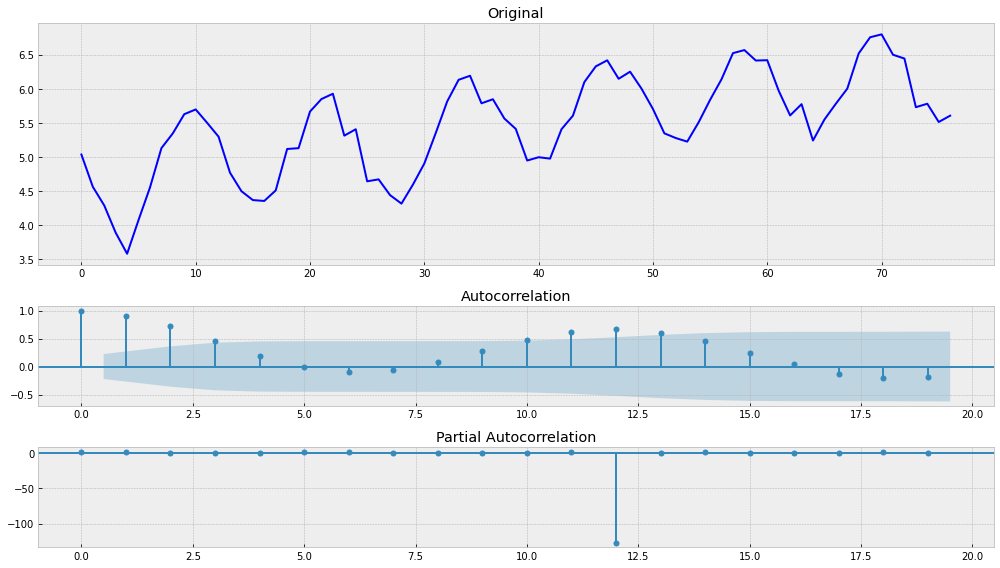

In [24]:
series = boxcox(series, 0)
tsplot(series)

Все еще ряд нестационарен, необходимо убрать размах дифференцированием

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
Lags Used                      11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


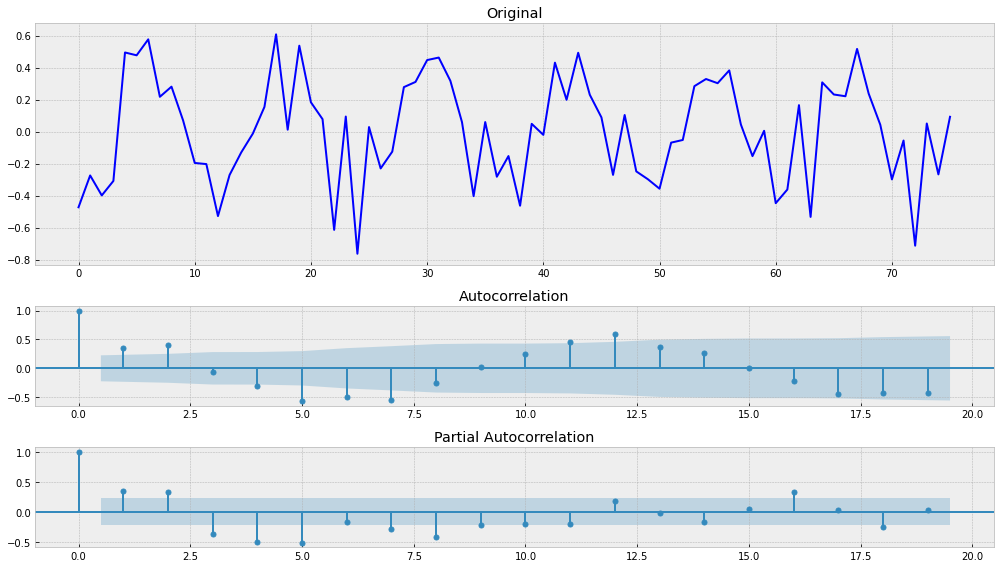

In [25]:
series = series[1:] - series[:-1]
tsplot(series)

p-value достаточно, чтобы отклонить гипотезу о нестационарности ряда. Ряд стационарен

#### "Monthly Boston armed robberies"

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
Lags Used                       11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


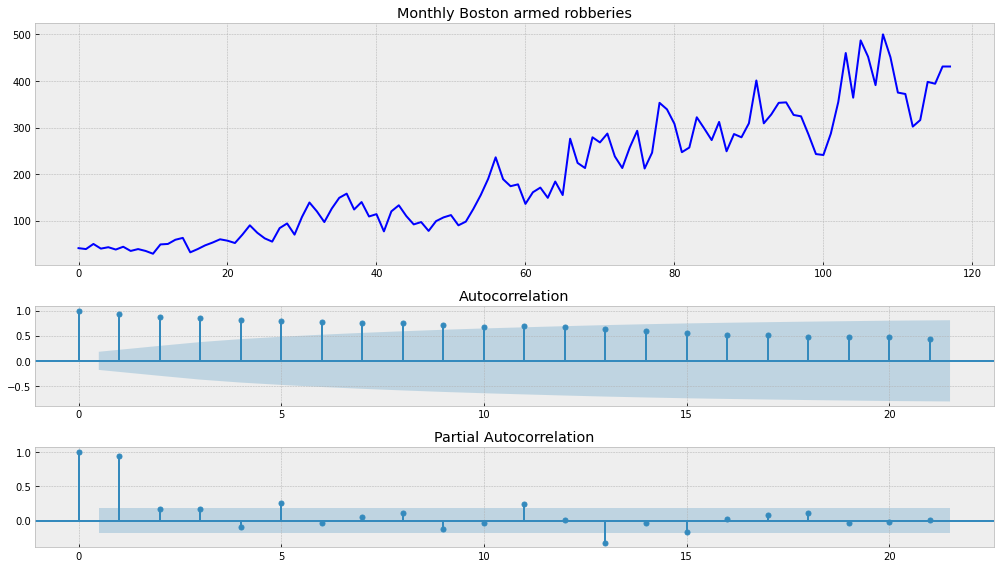

In [29]:
i = 1
title, series = all_series[i]
tsplot(series, title=title)

Ряд нестационарен, p-value = 0.994278 + графики это подтверждают визуально

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
Lags Used                       10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


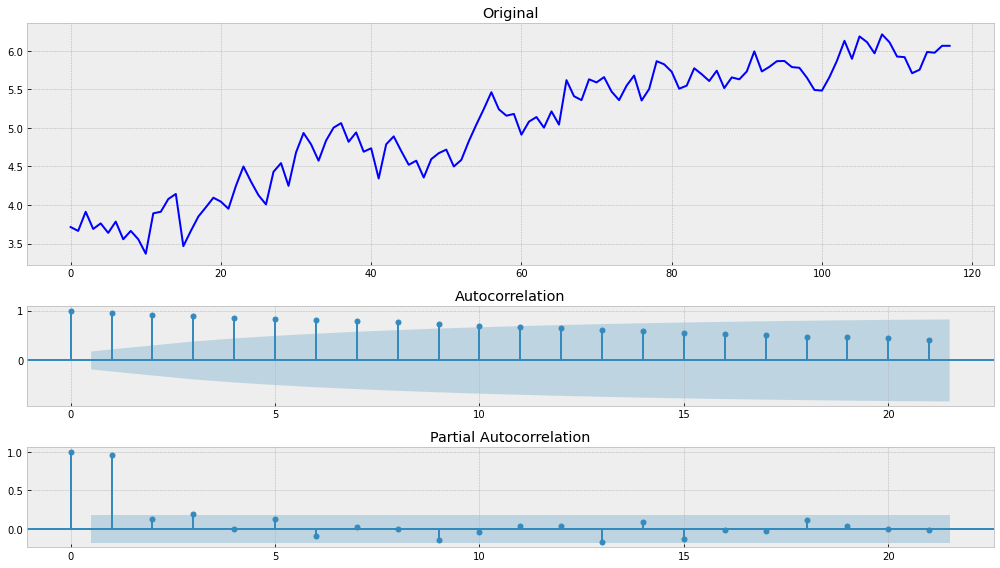

In [30]:
series = boxcox(series, 0)
tsplot(series)

По тесту Дики-Фуллера ряд нестационарен. Видно наличие сильного тренда, уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
Lags Used                      3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


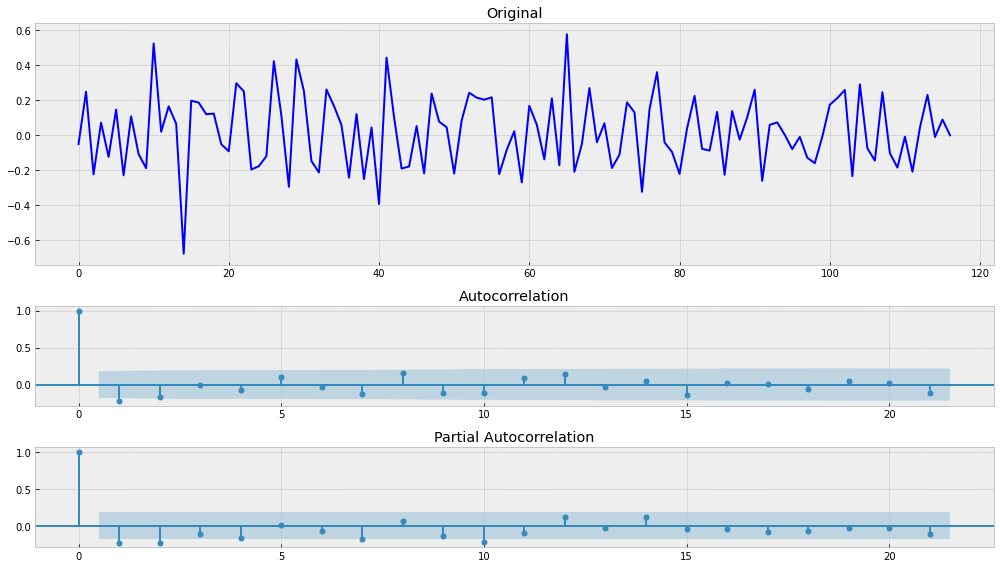

In [31]:
series = series[1:] - series[:-1]
tsplot(series)

Теперь ряд стационарен

#### "Mean monthly air temperature (Deg. F) Nottingham Castle"

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
Lags Used                       14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


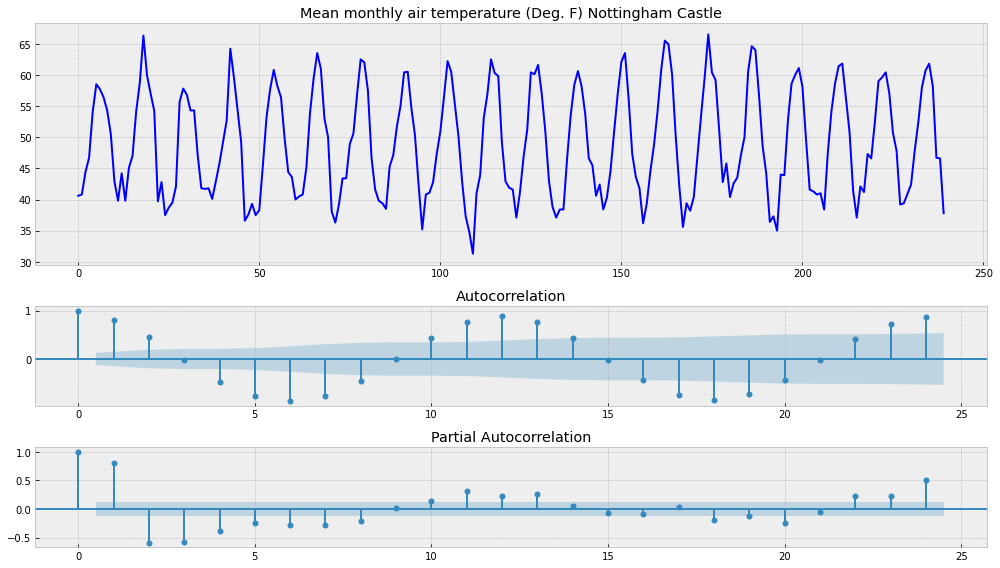

In [32]:
i = 2
title, series = all_series[i]
tsplot(series, title=title)

p-value достаточно, чтобы отклонить гипотезу о нестационарности ряда. Ряд стационарен

#### "Weekly closings of the Dow-Jones industrial average"

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
Lags Used                        0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


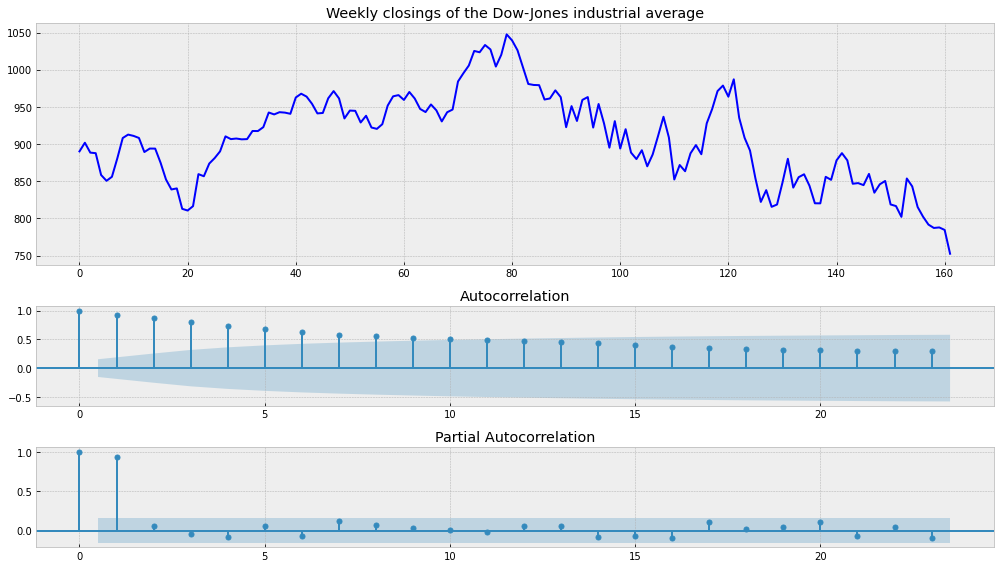

In [33]:
i = 3
title, series = all_series[i]
tsplot(series, title=title)

Ряд нестационарен, преобразуем

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
Lags Used                      0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


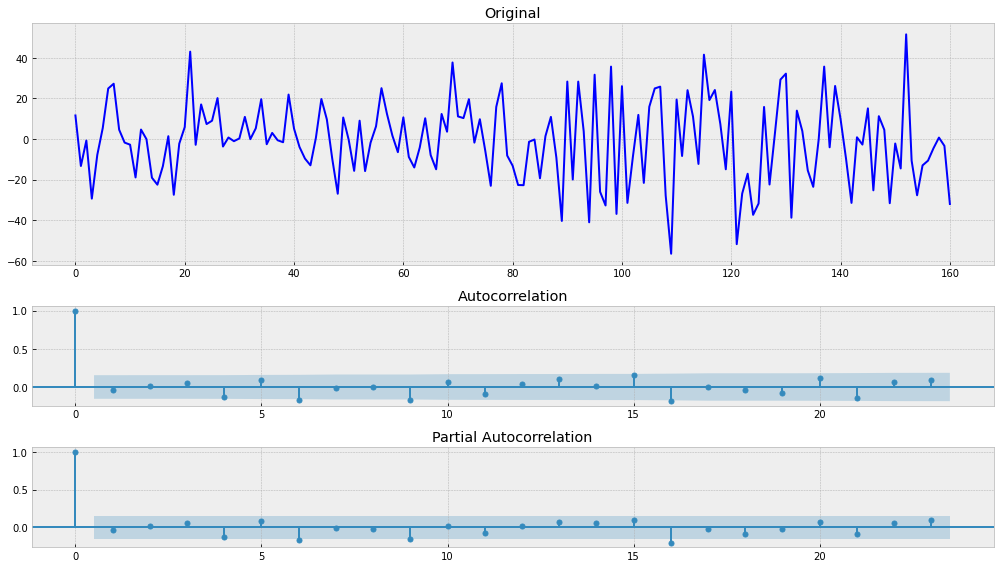

In [34]:
series = series.to_numpy()
series = series[1:] - series[:-1]
tsplot(series)

Ряд стационарен

#### "Daily total female births in California"

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
Lags Used                        6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


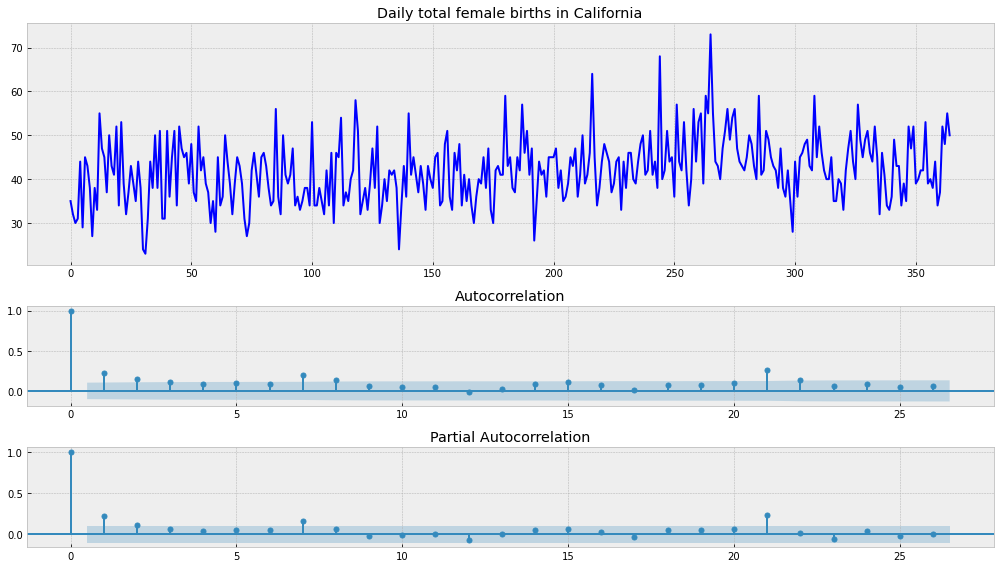

In [35]:
i = 4
title, series = all_series[i]
tsplot(series, title=title)

Ряд стационарен